본 과제는 아나콘다 설치후 포함된 주피터 노트북을 사용하여 구현합니다.

본 과제를 구현하기 위해서는 강의자료 10주차 numpy 활용을 참고하여 구현하시면 됩니다.

 

인구 공공데이터는 http://27.101.213.4/index.jsp 에서 받으시면 됩니다. 과제에 필요한 데이터를 csv파일로 저장한 후 불필요한 부분에 대해 꼭 정제를 한후 데이터를 사용합니다.

 

수강생 본인이 태어난 지역(동단위)의 여성 인구 구조가 가장 비슷한 지역을 찾고, 본인이 태어난 지역(동단위)의 여성 인구 현황과 여성 인구 구조가 가장 비슷한 지역의 여성 인구 현황을 꺽은선 그래프로 시각화하시오(강의자료 10주차 19페이지 참고).  

 

인구 공공데이터의 조회기간은 2021년 2월, 남여구분에 체크, 연령구분단위는 1세, 만 연령구분은 0이고 100이상으로 설정한 후 검색합니다. 검색된 화면 상단에 보면, 전체읍면동현황에 체크한 후 csv 파일 다운로드 버튼을 클릭하여 해당 데이터를 다운로드 및 저장합니다.

 

프로그램 파일 1개(학번_1.ipynb), 저장한 그림파일 1개(확장명 png) 및 사용한 데이터 1개(확장명 csv)를 제출합니다. 저장한 그림파일이란 프로그래상에서 저장된 그림파일을 의미합니다.

여성 인구 구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해 주세요 : 철산3동


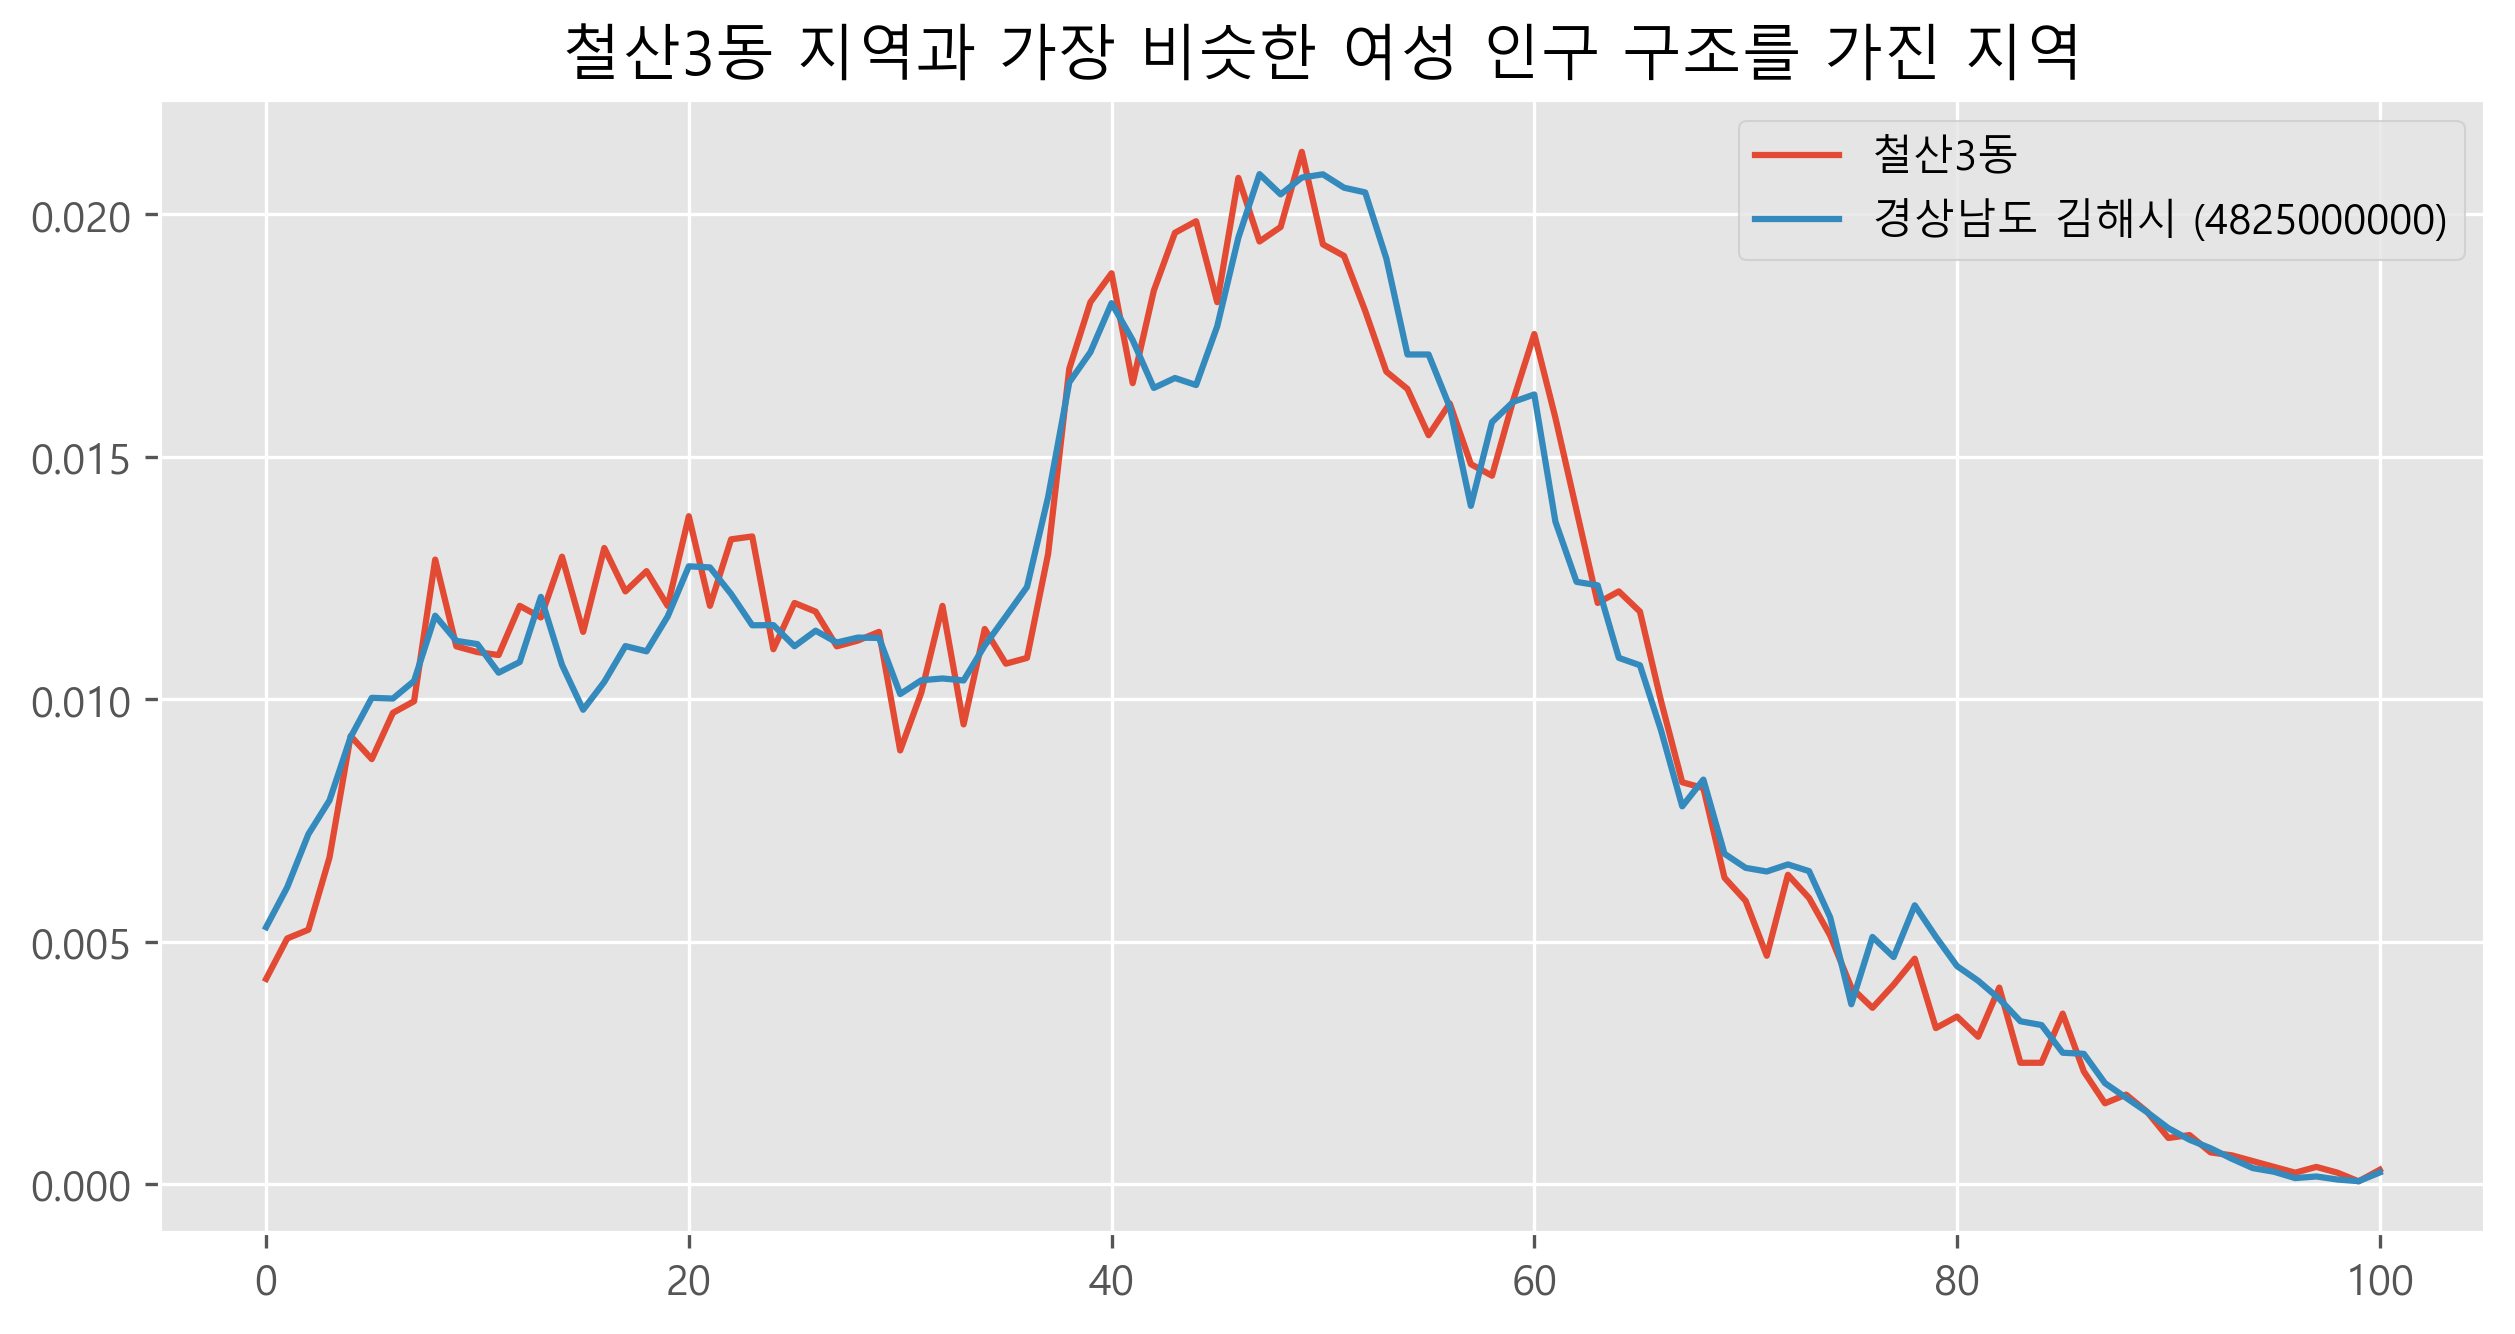

In [3]:
import numpy as np
import csv

# 1. 데이터를 읽어온다.
f = open('female.csv')
data = csv.reader(f)
next(data)
data = list(data)

# 2. 궁금한 지역의 이름을 입력받는다.
name = input('여성 인구 구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해 주세요 : ')
mn = 1              # 최솟값을 저장할 변수 생성 및 초기화
result_name = ''    # 최솟값을 갖는 지역의 이름을 저장할 변수 생성 및 초기화
result = 0          # 최솟값을 갖는 지역의 연령대별 인구 비율을 저장할 배열 생성 및 초기화

# 3. 궁금한 지역의 인구 구조를 저장한다.
for row in data:
    if name in row[0]:
        np.seterr(divide='ignore', invalid='ignore')        #RuntimeWarning: invalid value encountered in divide
        home = np.array(row[3:], dtype=int)/int(row[2])     #사용자로부터 입력받은 지역의 인구 비율을 home에 저장

# 4. 궁금한 지역의 인구 구조와 가장 비슷한 인구 구조를 가진 지역을 찾는다
for row in data:
    away = np.array(row[3:], dtype=int)/int(row[2])     # 다른 지역의 인구 비율을 away에 저장한 후
    s = np.sum((home-away)**2)                          # home에 저장된 값과 away에 저장된 값의 차이의 합을 계산(제곱하여 음수 제거)
    if s < mn and name not in row[0]:
        mn = s
        result_name = row[0]
        result = away
        
# 5. 궁금한 지역의 인구 구조와 가장 비슷한 곳의 인구 구조를 시각화한다.
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.figure(figsize = (10,5), dpi=300)
plt.rc('font', family='Malgun Gothic')
plt.title(name+ ' 지역과 가장 비슷한 여성 인구 구조를 가진 지역')
plt.plot(home, label = name)
plt.plot(result, label = result_name)
plt.legend()
plt.savefig('여성인구.png') 
plt.show()